### 1. Importing the libraries. Loading and preprocessing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
 #checking number of missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
# Display the summary of the dataset
print("\nDataset Summary:")
print(df.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [6]:
#Converting categorical data to numerical
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [7]:
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 2  


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB
None


In [9]:
# Feature Selection. 
# Define independent (features) and dependent (target) variables
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
        'basement', 'hotwaterheating', 'airconditioning', 'parking',
        'prefarea', 'furnishingstatus']]
y = df['price']

### 2. Split data into train-test sets

In [10]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(f'Training set: {X_train.shape}')
print(f'Testing set: {X_test.shape}')

Training set: (436, 12)
Testing set: (109, 12)


### 3. Fit a Linear Regression Model

In [12]:
# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# View the model's coefficients and intercept
print(f'Coefficients: {lr_model.coef_}')
print(f'Intercept: {lr_model.intercept_}')

Coefficients: [2.35848772e+02 7.85744924e+04 1.09711727e+06 4.06223164e+05
 3.66824192e+05 2.33146766e+05 3.93159779e+05 6.87881311e+05
 7.85550579e+05 2.25756514e+05 6.29901661e+05 2.10397118e+05]
Intercept: -127711.16739244387


In [14]:
# Interpretation Example
print("\nInterpretation:")
print("Each coefficient represents the expected change in house price for a one-unit increase in the respective feature, assuming all other features are constant")


Interpretation:
Each coefficient represents the expected change in house price for a one-unit increase in the respective feature, assuming all other features are constant


In [15]:
# predicting the test set results in linear regression model
y_pred=lr_model.predict(X_test)

In [16]:
print(y_pred)

[5203691.70963178 7257004.02115476 3062828.59668171 4559591.65374424
 3332932.30559782 3563080.67918997 5645466.31219972 6413979.66873635
 2755831.54819    2668938.66075228 9570600.29915353 2827431.50860061
 3195686.2583409  3352263.99438471 3713879.49996131 5301088.24435749
 2987920.2666968  4810799.8212371  4383031.70489929 3525092.18938646
 5796259.50068013 5840000.70299301 2760214.608641   4762590.14920607
 5204755.73895206 7515542.71619025 3254681.68956382 5236164.45964444
 8178523.16820284 3434166.15675649 6443921.58767581 3346004.77919184
 6742324.74004133 4154936.84088665 3589152.47491252 5788125.92515322
 4768370.18154076 4391684.04193171 3217657.04549935 4638196.61928878
 4522160.27786714 3541284.06127245 7238136.11941171 4021515.68926614
 3701978.76822757 4298879.55563098 6705004.0206061  3993466.52296896
 3798185.05328059 3451821.5624289  7293996.86867461 2832905.26972678
 4378698.1476993  4468002.85418353 3714623.89765883 2718466.90282779
 7524449.64983626 2950437.1495281 

### 4. Evaluate Linear Regression Model

In [17]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Simple Linear Regression Model")
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Simple Linear Regression Model
Mean Absolute Error: 979679.6912959901
Mean Squared Error: 1771751116594.0344
Root Mean Squared Error: 1331071.4167895103
R² Score: 0.6494754192267804


### 5. Visualization

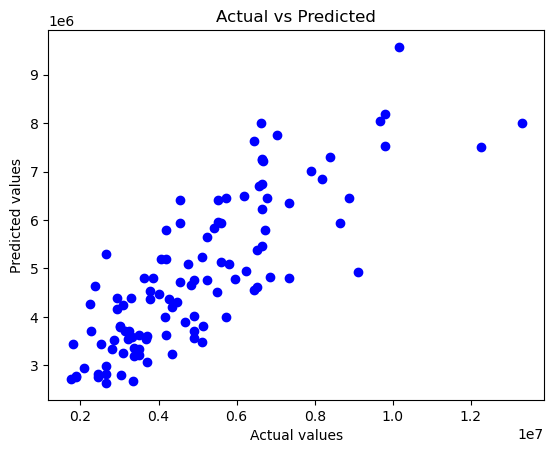

In [18]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

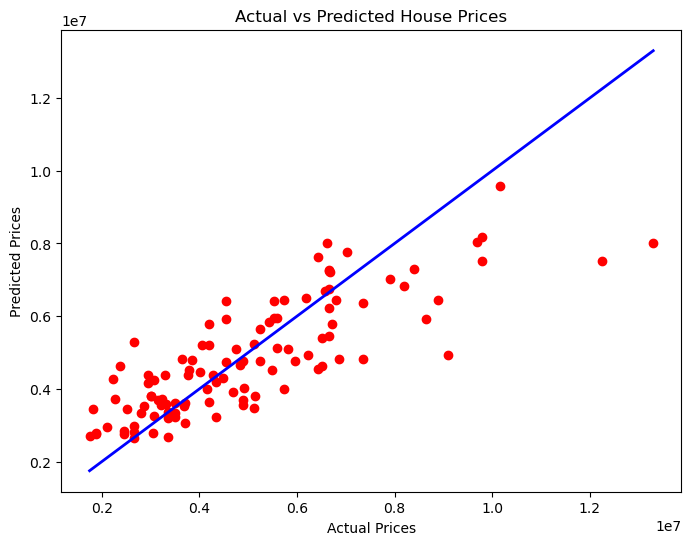

In [19]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()